In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

# Introduction: (Ann Nguyen and Hursh Desai)

For our project, I was interested in seeing the relationship between Canadian federal elections (specifically candidate party) and demographic, immigration, and household financial expenditure within Canada. 

My hypothesis I was testing is that an increase in votes for the Liberal party would have a signficant influence on demographic growth and immigration. While an increase in votes for the Conservative party would increase household financial expenditure based on the power of the party within the country. 

In order to see that, I first analyzed the data on it's own, before regressing against party voting to see if there were any trends within the country to begin wtih. Then, in order to test our hypothesis, I ran regressions against the three biggest parties within Canada that have been present since 1997 (the start of the Canadian federal election data) and our three data points to see any correlations. 

Contents:  
    1) Data Description  
    2) Data cleaning  
    3) Canada analaysis of data  
    4) Provincial analysis of data  
    5) Regression analysis between party and demographic growth, immigration, and household financial expenditure. 

###  Data Description

We worked with two sets of data:   
1) Canadian federal election data from https://www.kaggle.com/smid80/canadian-federal-election-results-timeseries/data and   
2) demographic growth, household financial ependiture, and immigration data from the national Canadian statistics database. 

In order to work with the Canadian federal election data, we merged the data on variables in common between the datasets, that in the end left us with a complete look at who had been elected in which province in Canada and which party they were a part of. 

# 1) Data Cleaning

In order to be able to work with the Canadian demographic data I had to download it as panel data and clean up the csv in Excel. Only then was I abel to read the csv into a dataframe.


In [2]:
dg = pd.read_csv("1710000801-eng-4.csv")
expend = pd.read_csv("3610022501-eng-4.csv")
students = pd.read_csv("3710000701-eng-3.csv")

candidates = pd.read_csv("Candidates.csv",low_memory = False)
ge_dates = pd.read_csv("GE Dates.csv",low_memory = False)
parties = pd.read_csv("Parties.csv",low_memory = False)
poll_details = pd.read_csv("Poll Details.csv",low_memory = False)
# rejected_ballots = pd.read_csv("Rejected Ballots.csv")
results = pd.read_csv("Results.csv",low_memory = False)
ridings = pd.read_csv("Ridings.csv",low_memory = False)

In [3]:
x = pd.merge(candidates,parties,how = 'left',on=['party_abbreviation_english_anglais'])
y = pd.merge(x,results,how='left',on=['election_id','electoral_district_number_numéro_de_circonscription','ballot_sequence_number'])
z = pd.merge(y,ridings,how='left',on=['election_id','electoral_district_number_numéro_de_circonscription'])

In [4]:
z1 = z[['election_id','canadian_province','party_abbreviation_english_anglais']]
z1 = z1.rename(columns={"election_id": "Year", "canadian_province": "Geography", "party_abbreviation_english_anglais": "Party"})
z1['Year'] = z1['Year'].str[6:]

In [5]:
group = z1.groupby(['Geography', 'Year', 'Party'])['Party'].count().to_frame()
group = group.rename(columns={"Party": "Count"})
group.reset_index(inplace=True)  

In [6]:
lib = group.loc[(group['Party'] == 'Liberal')]
lib = lib.rename(columns={"Count": "Liberal"})
lib = lib.drop('Party', axis=1)

NDP = group.loc[(group['Party'] == 'NDP')]
NDP = NDP.rename(columns={"Count": "NDP"})
NDP = NDP.drop('Party', axis=1)

Conservative = group.loc[(group['Party'] == 'Conservative')]
Conservative = Conservative.rename(columns={"Count": "Conservative"})
Conservative = Conservative.drop('Party', axis=1)

In [7]:
dg = dg.rename(columns=dg.iloc[4])
expend = expend.rename(columns=expend.iloc[4])
students = students.rename(columns=students.iloc[4])

dg = dg.drop([0,1,2,3,4,5])
expend = expend.drop([0,1,2,3,4,5])
students = students.drop([0,1,2,3,4,5])

dg['Reference period'] = dg['Reference period'].str[0:4]
students['Reference period'] = students['Reference period'].str[0:4]

dg = dg.reset_index()
dg = dg.drop(['index'], axis=1)

expend = expend.reset_index()
expend = expend.drop(['index'], axis=1)
expend = expend.iloc[:,0:3]

students = students.reset_index()
students = students.drop(['index'], axis=1)

dg = dg.fillna(method='ffill')
expend = expend.fillna(method='ffill')
students = students.fillna(method='ffill')

In [8]:
var = dg.merge(expend, on=['Geography', 'Reference period'], how='left').merge(students, on=['Geography', 'Reference period'], how='left')
var = var.rename(columns={"Reference period": "Year","Births 2 3":"Births","Deaths 4 5":"Deaths","Immigrants 6":"Immigrants","Emigrants 7 8":"Emigrants"
                           ,"Returning emigrants 8 9":"Returning Emigrants"
                           ,"Net temporary emigrants 8 10":"Net temporary emigrants","Net interprovincial migration 11":"Net interprovincial migration"
                          ,"Net non-permanent residents 12 13 14":"Net non-permanent residents","Residual deviation 15":"Residual deviation"})
var = var.replace('..','0')

In [9]:
pd.DataFrame(data = var)

,Geography,Year,Births,Deaths,Immigrants,Emigrants,Returning Emigrants,Net temporary emigrants,Net interprovincial migration,Net non-permanent residents,Residual deviation,Household final consumption expenditure,"Total, sex"
0,Canada,1997,"345,123","217,688","194,459","51,816","18,671","25,563",0,"-3,983","9,978","504,393.00","5,106,684"
1,Canada,1998,"338,295","217,632","173,194","48,008","17,491","25,567",0,"18,317","9,977","524,727.00","5,115,531"
2,Canada,1999,"336,912","217,229","205,710","48,089","17,680","25,564",0,"25,032","10,008","553,509.00","5,125,881"
3,Canada,2000,"327,107","219,114","252,527","47,766","17,910","25,563",0,"39,592","9,521","589,028.00","5,105,640"
4,Canada,2001,"328,155","220,494","256,405","50,149","25,727","27,558",0,"33,510","6,419","615,179.00","5,099,142"
5,Canada,2002,"330,523","223,905","199,170","53,890","29,257","27,559",0,"36,771","6,418","651,605.00","5,081,703"
6,Canada,2003,"337,762","228,829","239,083","58,184","30,441","27,560",0,"10,348","6,434","681,207.00","5,016,078"
7,Canada,2004,"339,270","229,906","244,578","57,633","31,620","27,559",0,"9,148","6,420","712,940.00","4,977,102"
8,Canada,2005,"346,082","225,489","254,374","61,412","34,711","27,558",0,"15,978","9,265","752,413.00","4,937,748"
9,Canada,2006,"360,916","233,825","238,125","66,512","39,235","18,523",0,"27,424","28,989","793,642.00","4,882,290"


In [10]:
var['Births'] = var['Births'].str.replace(',','').astype(int)
var['Deaths'] = var['Deaths'].str.replace(',','').astype(int)
var['Immigrants'] = var['Immigrants'].str.replace(',','').astype(int)
var['Emigrants'] = var['Emigrants'].str.replace(',','').astype(int)
var['Returning Emigrants'] = var['Returning Emigrants'].str.replace(',','').astype(int)[:-2]
var['Net temporary emigrants'] = var['Net temporary emigrants'].str.replace(',','').astype(int)
var['Net interprovincial migration'] = var['Net interprovincial migration'].str.replace(',','').astype(int)
var['Net non-permanent residents'] = var['Net non-permanent residents'].str.replace(',','').replace(',','').astype(int)
var['Residual deviation'] = var['Residual deviation'].str.replace(',','').astype(int)
var['Household final consumption expenditure'] = var['Household final consumption expenditure'].str.replace(',','').astype(float).astype(int)
var['Total, sex'] = var['Total, sex'].str.replace(',','').astype(int)

# 3)Canada Demographic Analysis

In [11]:
Canada, NL, PEI, NS, NB, Quebec, Ontario, Manitoba, Saskat, Alberta, BC = var[:21][:], var[21:42][:], var[42:63][:], dg[63:84][:], var[84:105][:], var[105:126][:], var[126:147][:], var[147:168][:], var[168:189][:], var[189:208][:], var[210:230][:]

Text(0.5, 1.0, 'Births and Deaths in Canada')

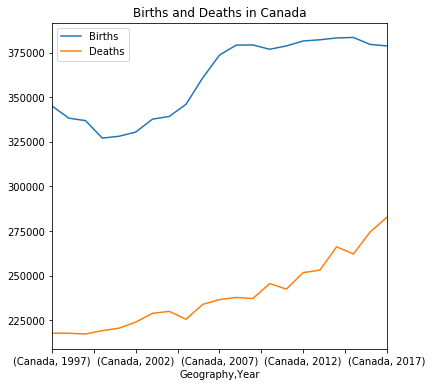

In [12]:
canadademo = Canada.groupby(['Geography','Year'])['Births','Deaths'].sum()
fig,ax = plt.subplots()
canadademo.plot(ax=ax,figsize = (6,6))
ax.set_title('Births and Deaths in Canada')

Text(0.5, 1.0, 'Immigrants and Emigrants in Canada')

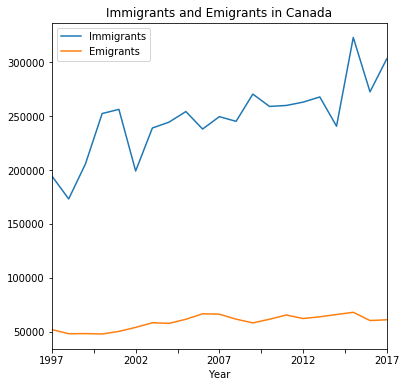

In [13]:
canadamig = Canada.groupby(['Year'])['Immigrants','Emigrants'].sum()
fig,ax = plt.subplots()
canadamig.plot(ax=ax,figsize = (6,6))
ax.set_title('Immigrants and Emigrants in Canada')

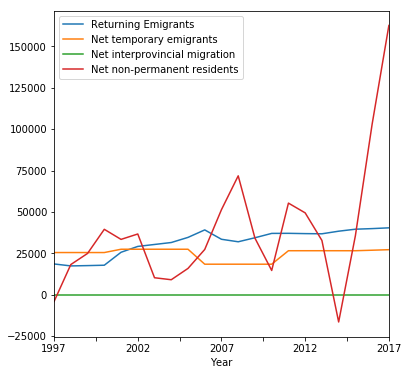

In [14]:
canadanetmig = Canada.groupby(['Year'])['Returning Emigrants','Net temporary emigrants','Net interprovincial migration','Net non-permanent residents'].sum()
fig,ax = plt.subplots()
canadanetmig.plot(ax = ax,figsize = (6,6))

Text(0, 0.5, 'Household consumption expenditure')

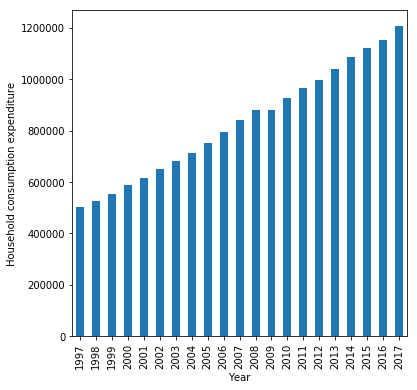

In [15]:
canadahfe = Canada.groupby(['Year'])['Household final consumption expenditure'].sum()
fig,ax = plt.subplots()
canadahfe.plot(ax = ax,figsize = (6,6),kind = 'bar')
ax.set_ylabel('Household consumption expenditure')

# 4) Canada Demographic Analysis (province level)
1) Births / Deaths 
2) Immigrants 
3) Household Financial Expenditure 

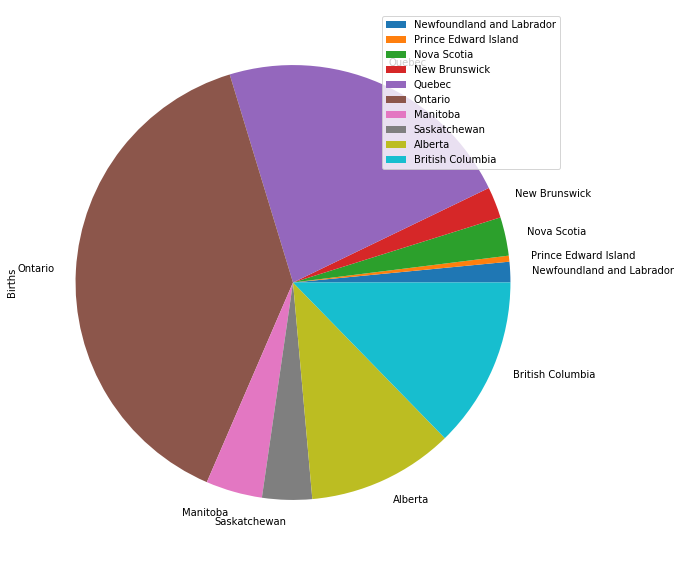

In [16]:
# Percent of total
Births1997 = var.loc[var['Year'] == '1997'][1:]
Births1997.set_index('Geography').plot.pie(y='Births',figsize = (10,10))

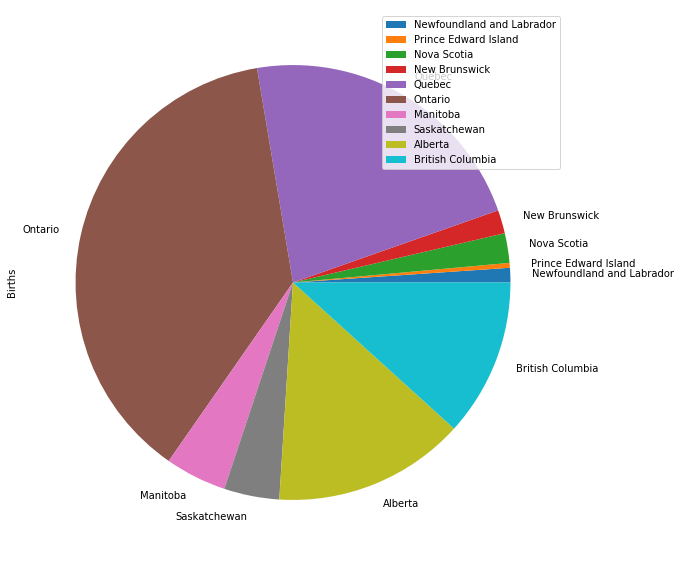

In [17]:
Births2017 = var.loc[var['Year'] == '2017'][1:]
Births2017.set_index('Geography').plot.pie(y='Births',figsize = (10,10))

We can see that Ontario and Alberta have the largest changes, while the other provinces have somewhat stable birth numbers. 

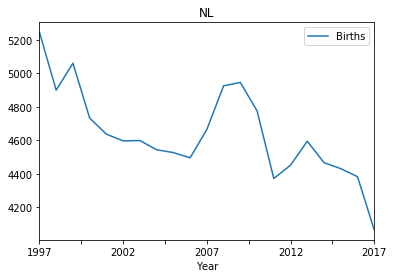

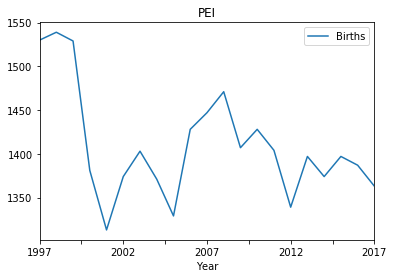

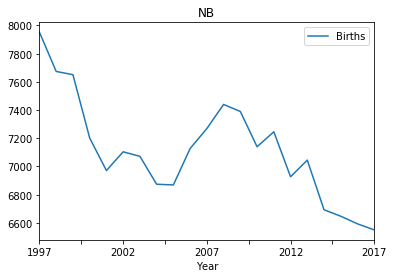

In [18]:
NL.set_index('Year')['Births'].to_frame().plot(title = 'NL')
PEI.set_index('Year')['Births'].to_frame().plot(title = 'PEI')
# NS.set_index('Year')['Births'].to_frame().plot()
NB.set_index('Year')['Births'].to_frame().plot(title = 'NB')


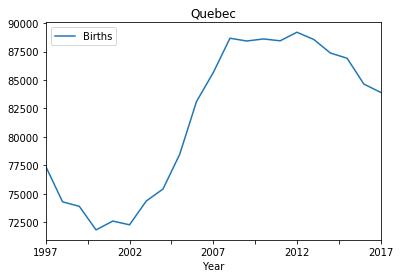

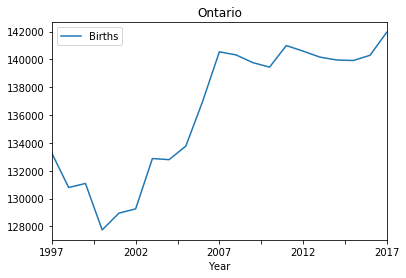

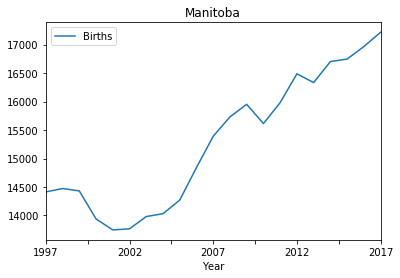

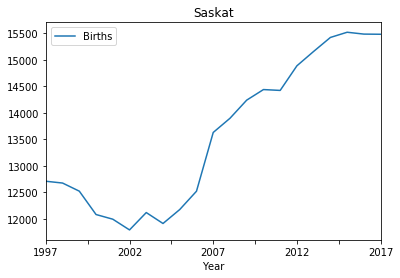

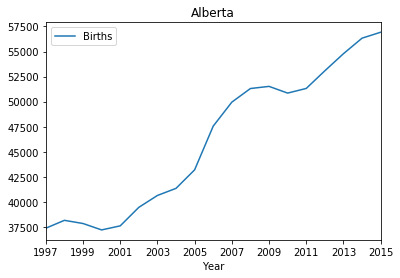

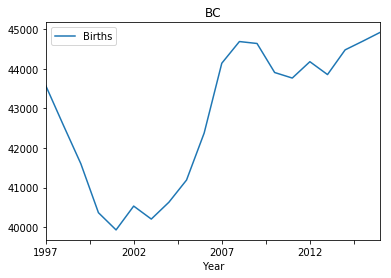

In [19]:
Quebec.set_index('Year')['Births'].to_frame().plot(title = 'Quebec')
Ontario.set_index('Year')['Births'].to_frame().plot(title = 'Ontario')
Manitoba.set_index('Year')['Births'].to_frame().plot(title = 'Manitoba')
Saskat.set_index('Year')['Births'].to_frame().plot(title = 'Saskat')
Alberta.set_index('Year')['Births'].to_frame().plot(title = 'Alberta')
BC.set_index('Year')['Births'].to_frame().plot(title = 'BC')

NL, PEI, NB follow a general downward trend, while the rest of the provinces dip in 2000, an have been on an uptrend from 2000 - 2017. 

There is a more consistent upwards trend for household financial expenditure between provinces.

Comparing birth to death spread, the difference between 1997 births and 2017 births is on average higher than the difference between 1997 deaths and 2017 deaths.
This ind

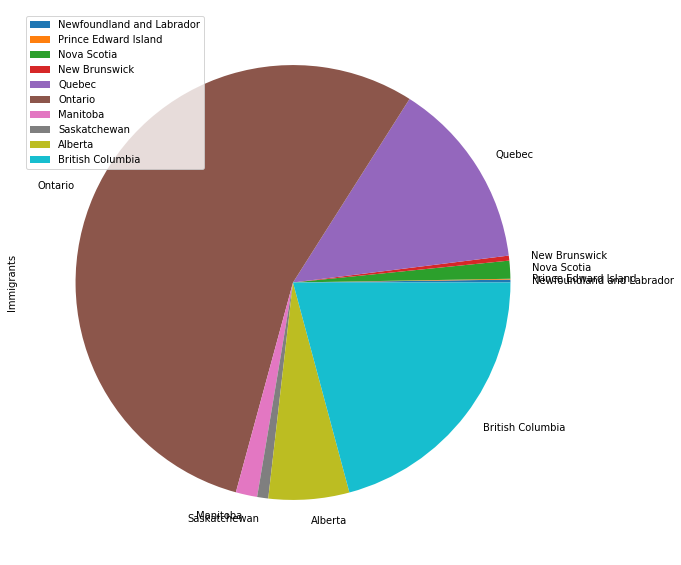

In [21]:
Imm1997 = var.loc[var['Year'] == '1997'][1:]
Imm1997.set_index('Geography').plot.pie(y='Immigrants',figsize = (10,10))

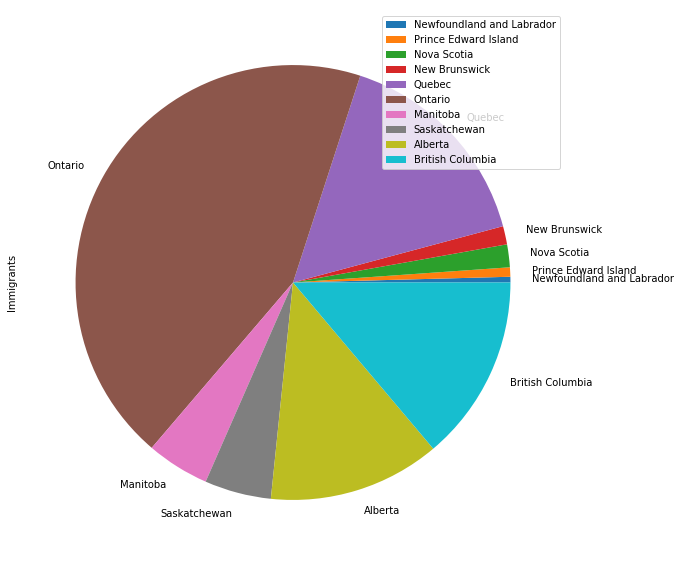

In [22]:
Imm2017 = var.loc[var['Year'] == '2017'][1:]
Imm2017.set_index('Geography').plot.pie(y='Immigrants',figsize = (10,10))

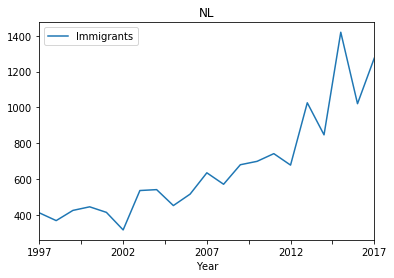

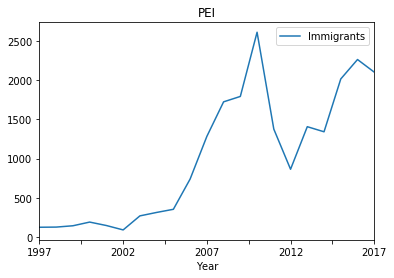

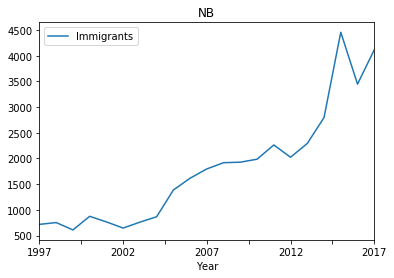

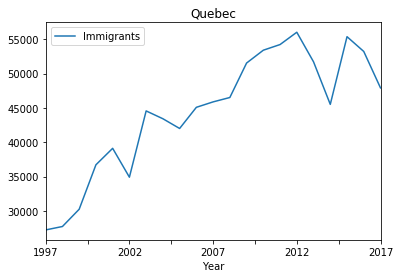

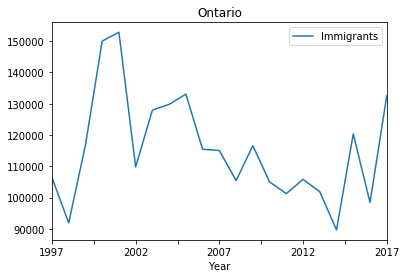

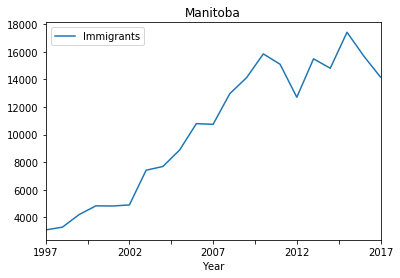

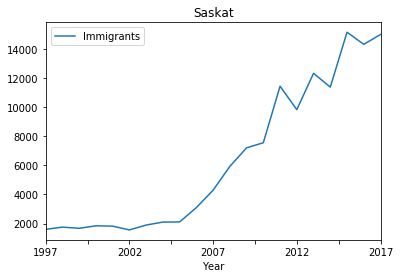

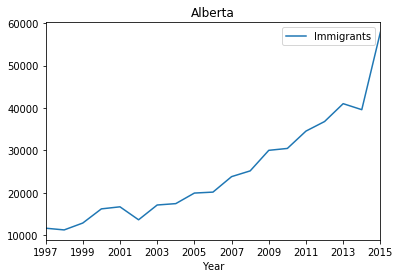

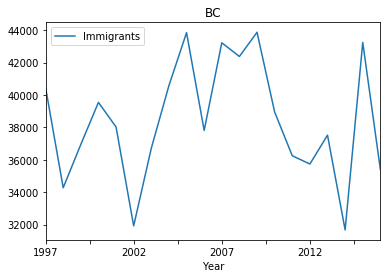

In [23]:
NL.set_index('Year')['Immigrants'].to_frame().plot(title = 'NL')
PEI.set_index('Year')['Immigrants'].to_frame().plot(title = 'PEI')
# NS.set_index('Year')['Immigrants'].to_frame().plot()
NB.set_index('Year')['Immigrants'].to_frame().plot(title = 'NB')
Quebec.set_index('Year')['Immigrants'].to_frame().plot(title = 'Quebec')
Ontario.set_index('Year')['Immigrants'].to_frame().plot(title = 'Ontario')
Manitoba.set_index('Year')['Immigrants'].to_frame().plot(title = 'Manitoba')
Saskat.set_index('Year')['Immigrants'].to_frame().plot(title = 'Saskat')
Alberta.set_index('Year')['Immigrants'].to_frame().plot(title = 'Alberta')
BC.set_index('Year')['Immigrants'].to_frame().plot(title = 'BC')

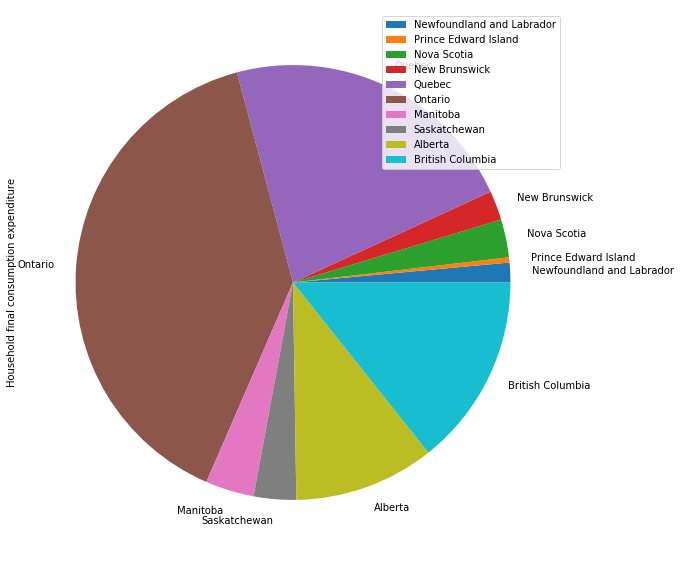

In [24]:
HFE1997 = var.loc[var['Year'] == '1997'][1:]
HFE1997.set_index('Geography').plot.pie(y='Household final consumption expenditure',figsize = (10,10))

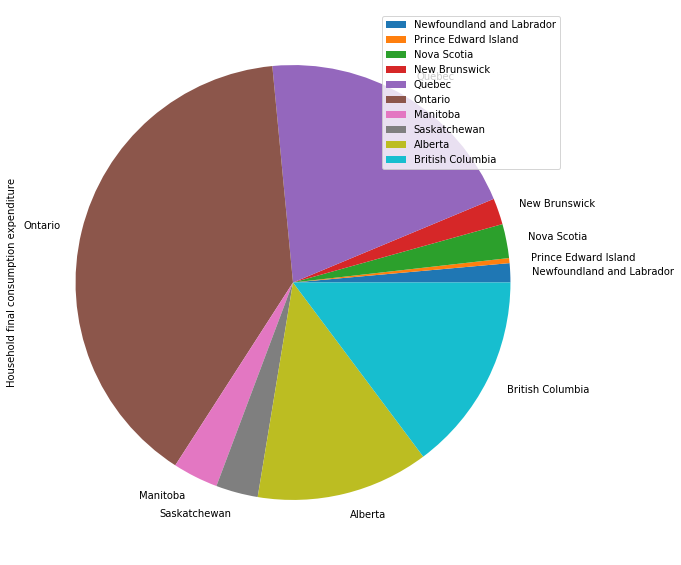

In [25]:
HFE1997 = var.loc[var['Year'] == '2017'][1:]
HFE1997.set_index('Geography').plot.pie(y='Household final consumption expenditure',figsize = (10,10))

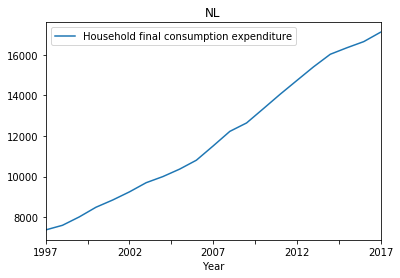

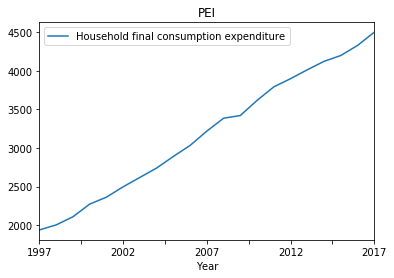

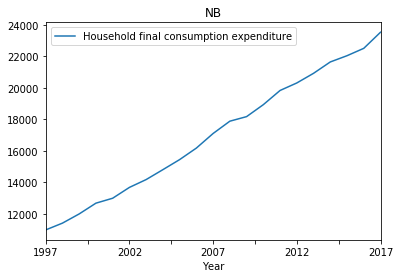

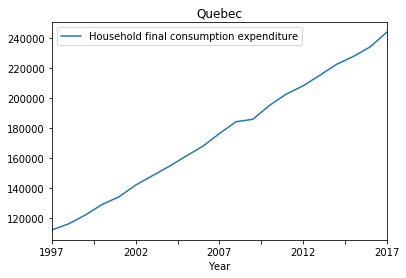

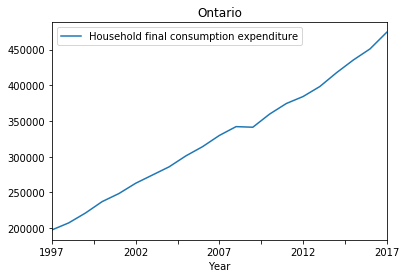

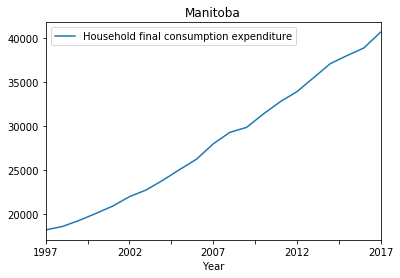

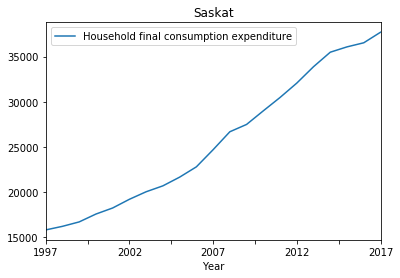

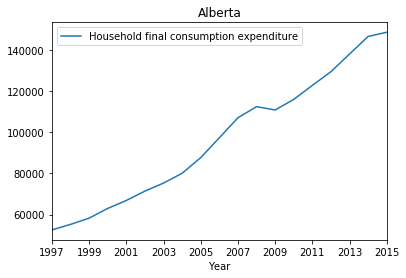

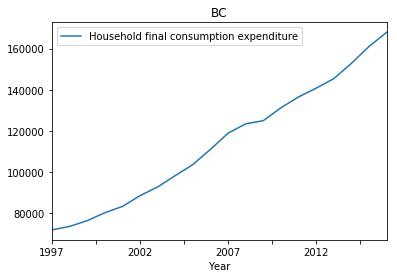

In [26]:
NL.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'NL')
PEI.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'PEI')
# NS.set_index('Year')['Household final consumption expenditure'].to_frame().plot()
NB.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'NB')
Quebec.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'Quebec')
Ontario.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'Ontario')
Manitoba.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'Manitoba')
Saskat.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'Saskat')
Alberta.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'Alberta')
BC.set_index('Year')['Household final consumption expenditure'].to_frame().plot(title = 'BC')

### Merging Demographic data with Election Data

In [54]:
ting = var.merge(lib, on=['Geography', 'Year'], how='left').merge(NDP, on=['Geography', 'Year'], how='left').merge(Conservative, on=['Geography', 'Year'], how='left')
ting = ting.fillna(method='ffill')
# ting = var.merge(lib, on=['Geography', 'Year'], how='left')
# ting = ting.head(68)
ting1 = var.merge(NDP, on=['Geography', 'Year'], how='left')
ting1 = ting1.head(68)
ting2 = var.merge(Conservative, on=['Geography', 'Year'], how='right')

In [55]:
Canada, NL, PEI, NS, NB, Quebec, Ontario, Manitoba, Saskat, Alberta, BC = ting[:21][:], ting[21:42][:], ting[42:64][:], ting[64:86][:], ting[86:108][:], ting[108:130][:], ting[130:152][:], ting[152:174][:], ting[174:196][:], ting[196:208][:], ting[208:230][:]
Canada1, NL1, PEI1, NS1, NB1, Quebec1, Ontario1, Manitoba1, Saskat1, Alberta1, BC1 = var[:21][:], var[21:42][:], var[42:64][:], var[64:86][:], var[86:108][:], var[108:130][:], var[130:152][:], var[152:174][:], var[174:196][:], var[196:208][:], var[208:230][:]

In [56]:
ting = ting[21:][:]
ting

,Geography,Year,Births,Deaths,Immigrants,Emigrants,Returning Emigrants,Net temporary emigrants,Net interprovincial migration,Net non-permanent residents,Residual deviation,Household final consumption expenditure,"Total, sex",Liberal,NDP,Conservative
21,Newfoundland and Labrador,1997,5245,4340,411,297,66.0,105,-9490,-285,2273,7367,101766,NaN,NaN,NaN
22,Newfoundland and Labrador,1998,4899,4095,368,167,110.0,106,-5695,446,2274,7594,97557,NaN,NaN,NaN
23,Newfoundland and Labrador,1999,5060,4232,425,332,61.0,105,-4263,303,2280,8006,94119,NaN,NaN,NaN
24,Newfoundland and Labrador,2000,4732,4233,445,286,94.0,105,-4493,-135,1939,8484,90234,NaN,NaN,NaN
25,Newfoundland and Labrador,2001,4636,4126,414,265,97.0,354,-3352,57,-328,8841,86970,NaN,NaN,NaN
26,Newfoundland and Labrador,2002,4596,4276,316,215,190.0,354,-1683,76,-328,9242,84336,NaN,NaN,NaN
27,Newfoundland and Labrador,2003,4598,4254,536,200,159.0,355,-2027,178,-329,9695,81510,NaN,NaN,NaN
28,Newfoundland and Labrador,2004,4543,4434,541,238,107.0,354,-3710,127,-327,9997,79485,1459.0,1459.0,1459.0
29,Newfoundland and Labrador,2005,4526,4392,452,325,194.0,352,-4342,-69,-568,10365,76806,1459.0,1459.0,1459.0
30,Newfoundland and Labrador,2006,4495,4677,516,222,176.0,127,-4067,142,-2227,10804,74343,1578.0,1578.0,1578.0


### Statistical Analysis

In [57]:
reg = smf.ols(formula='Q("Births") ~ Q("Liberal")'
              , data=ting).fit()
reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("Births")   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     8960.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          1.13e-168
Time:                        16:03:30   Log-Likelihood:                -2059.7
No. Observations:                 203   AIC:                             4123.
Df Residuals:                     201   BIC:                             4130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -443.0064    587.575     -0.754      0.452   -1601.609     715.596
Q("Liberal")     5.3663      0.057     94.655      0.000       5.255       5.478
==============================================================================
Omnibus:                       29.070   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.897
Skew:                           0.893   Prob(JB):                     3.58e-09
Kurtosis:                       4.188   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

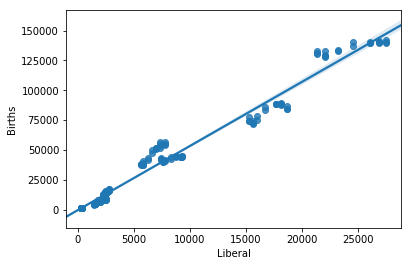

In [58]:
import seaborn as sns
sns.regplot(x='Liberal', y='Births', data=ting)

For every one vote added to Liberal, there is a 5.38 increase in Births.

In [59]:
reg = smf.ols(formula='Q("Births") ~ Q("NDP")'
              , data=ting).fit()
reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("Births")   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     9224.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          6.49e-170
Time:                        16:03:31   Log-Likelihood:                -2056.9
No. Observations:                 203   AIC:                             4118.
Df Residuals:                     201   BIC:                             4124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -481.1961    579.470     -0.830      0.407   -1623.816     661.423
Q("NDP")       5.3783      0.056     96.040      0.000       5.268       5.489
==============================================================================
Omnibus:                       31.405   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.823
Skew:                           0.946   Prob(JB):                     5.02e-10
Kurtosis:                       4.217   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

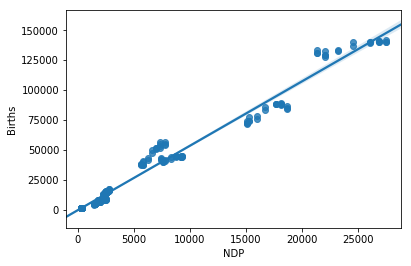

In [60]:
import seaborn as sns



sns.regplot(x='NDP', y='Births', data=ting)

For every one vote added to NDP, there is a 5.38 increase in Births.

In [61]:
reg = smf.ols(formula='Q("Births") ~ Q("Conservative")'
              , data=ting).fit()
reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("Births")   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     306.4
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           2.78e-42
Time:                        16:03:31   Log-Likelihood:                -2353.4
No. Observations:                 203   AIC:                             4711.
Df Residuals:                     201   BIC:                             4717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8956.4059   2443.885      3.665      0.000    4137.464    1.38e+04
Q("Conservative")     3.9085      0.223     17.503      0.000       3.468       4.349
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.963
Skew:                          -1.367   Prob(JB):                     5.19e-88
Kurtosis:                       9.328   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

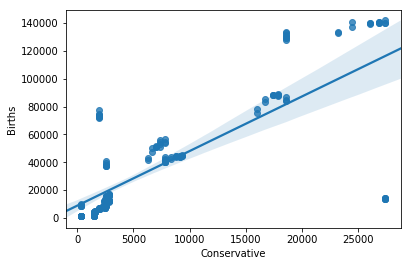

In [62]:
import seaborn as sns



sns.regplot(x='Conservative', y='Births', data=ting)

For every one vote added to Conservative, there is a 5.30 increase in Births.

In [63]:
reg = smf.ols(formula='Q("Immigrants") ~ Q("Liberal")'
              , data=ting).fit()

reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Immigrants")   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1336.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           9.50e-91
Time:                        16:03:31   Log-Likelihood:                -2206.0
No. Observations:                 203   AIC:                             4416.
Df Residuals:                     201   BIC:                             4423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4025.3766   1207.762     -3.333      0.001   -6406.885   -1643.868
Q("Liberal")     4.2602      0.117     36.558      0.000       4.030       4.490
==============================================================================
Omnibus:                       57.311   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.616
Skew:                           0.950   Prob(JB):                     1.43e-65
Kurtosis:                       8.630   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

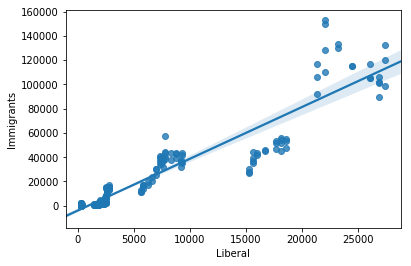

In [64]:
import seaborn as sns



sns.regplot(x='Liberal', y='Immigrants', data=ting)

For every one vote added to Liberal, there is a 4.37 increase in Immigrants.

In [65]:
reg = smf.ols(formula='Q("Immigrants") ~ Q("NDP")'
              , data=ting1).fit()

reg.predict()
reg.params
reg.summary()

c:\users\hd626\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Immigrants")   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.557
Date:                Fri, 27 Dec 2019   Prob (F-statistic):              0.236
Time:                        16:03:32   Log-Likelihood:                -111.44
No. Observations:                  14   AIC:                             226.9
Df Residuals:                      12   BIC:                             228.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    690.1763    346.324      1.993      0.070     -64.398    1444.751
Q("NDP")       0.3404      0.273      1.248      0.236      -0.254       0.935
==============================================================================
Omnibus:                        2.937   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.584
Skew:                           0.548   Prob(JB):                        0.453
Kurtosis:                       1.769   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

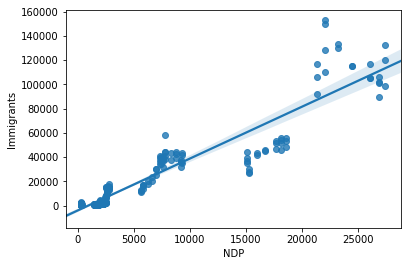

In [66]:
import seaborn as sns
sns.regplot(x='NDP', y='Immigrants', data=ting)

For every one vote added to NDP, there is a .34 increase in Immigrants.

In [67]:
reg = smf.ols(formula='Q("Immigrants") ~ Q("Conservative")'
              , data=ting2).fit()

reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Immigrants")   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     469.9
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.94e-26
Time:                        16:03:32   Log-Likelihood:                -533.75
No. Observations:                  50   AIC:                             1072.
Df Residuals:                      48   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2959.8556   2022.844     -1.463      0.150   -7027.055    1107.344
Q("Conservative")     4.1543      0.192     21.677      0.000       3.769       4.540
==============================================================================
Omnibus:                       11.293   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.920
Skew:                           0.631   Prob(JB):                     0.000128
Kurtosis:                       5.647   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

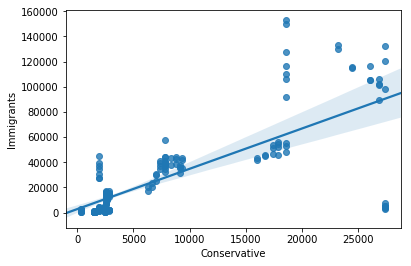

In [68]:
import seaborn as sns
sns.regplot(x='Conservative', y='Immigrants', data=ting)

For every one vote added to Conservative, there is a 4.15 increase in Immigrants.

In [69]:
reg = smf.ols(formula='Q("Household final consumption expenditure") ~ Q("Liberal")'
              , data=ting).fit()

reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Q("Household final consumption expenditure")   R-squared:                       0.934
Model:                                                      OLS   Adj. R-squared:                  0.934
Method:                                           Least Squares   F-statistic:                     2844.
Date:                                          Fri, 27 Dec 2019   Prob (F-statistic):          1.35e-120
Time:                                                  16:03:33   Log-Likelihood:                -2356.3
No. Observations:                                           203   AIC:                             4717.
Df Residuals:                                               201   BIC:                             4723.
Df Model:                                                     1                                         
Covariance Type:                                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5188.6454   2531.918     -2.049      0.042   -1.02e+04    -196.117
Q("Liberal")    13.0287      0.244     53.331      0.000      12.547      13.510
==============================================================================
Omnibus:                       31.395   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.130
Skew:                           0.405   Prob(JB):                     2.51e-33
Kurtosis:                       7.134   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

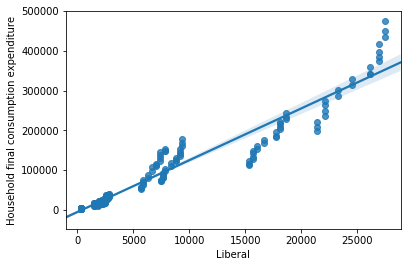

In [70]:
import seaborn as sns
sns.regplot(x='Liberal', y='Household final consumption expenditure', data=ting)

For every one vote added to Liberal, there is a 12.5 increase in Household final consumption expenditure.

In [71]:
reg = smf.ols(formula='Q("Household final consumption expenditure") ~ Q("NDP")'
              , data=ting1).fit()

reg.predict()
reg.params
reg.summary()

c:\users\hd626\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Q("Household final consumption expenditure")   R-squared:                       0.900
Model:                                                      OLS   Adj. R-squared:                  0.892
Method:                                           Least Squares   F-statistic:                     108.5
Date:                                          Fri, 27 Dec 2019   Prob (F-statistic):           2.30e-07
Time:                                                  16:03:33   Log-Likelihood:                -124.24
No. Observations:                                            14   AIC:                             252.5
Df Residuals:                                                12   BIC:                             253.8
Df Model:                                                     1                                         
Covariance Type:                                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    895.3585    864.257      1.036      0.321    -987.695    2778.412
Q("NDP")       7.0920      0.681     10.418      0.000       5.609       8.575
==============================================================================
Omnibus:                       11.743   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.531
Skew:                           1.430   Prob(JB):                       0.0232
Kurtosis:                       5.174   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

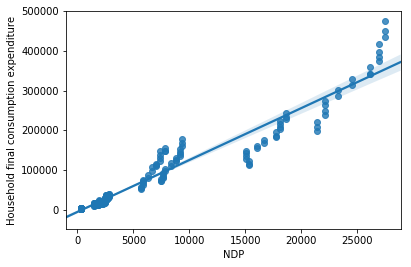

In [72]:
import seaborn as sns
sns.regplot(x='NDP', y='Household final consumption expenditure', data=ting)

For every one vote added to NDP, there is a .12.53 increase in Household final consumption expenditure.

In [73]:
reg = smf.ols(formula='Q("Household final consumption expenditure") ~ Q("Conservative")'
              , data=ting2).fit()

reg.predict()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Q("Household final consumption expenditure")   R-squared:                       0.962
Model:                                                      OLS   Adj. R-squared:                  0.961
Method:                                           Least Squares   F-statistic:                     1206.
Date:                                          Fri, 27 Dec 2019   Prob (F-statistic):           1.14e-35
Time:                                                  16:03:34   Log-Likelihood:                -568.29
No. Observations:                                            50   AIC:                             1141.
Df Residuals:                                                48   BIC:                             1144.
Df Model:                                                     1                                         
Covariance Type:                                      nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4012.2139   4035.566     -0.994      0.325   -1.21e+04    4101.835
Q("Conservative")    13.2792      0.382     34.732      0.000      12.510      14.048
==============================================================================
Omnibus:                       12.176   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.045
Skew:                           0.524   Prob(JB):                     2.21e-06
Kurtosis:                       6.377   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

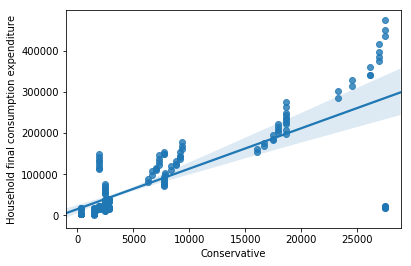

In [74]:
import seaborn as sns
sns.regplot(x='Conservative', y='Household final consumption expenditure', data=ting)

For every one vote added to Conservative, there is a 13.28 increase in Household final consumption expenditure.

Overall, there is a much higher slope for the regression run between the political parties and household final consumption expenditure than immigration and births. 

## Machine Learning 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from patsy import dmatrices
import sklearn

In [76]:
ting = ting.rename(columns={"Household final consumption expenditure": "consumption",})

In [77]:
y,X = dmatrices('consumption ~ Liberal + Births + Immigrants',ting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

knn = KNeighborsClassifier(n_neighbors=30)
clf = LogisticRegression(random_state=15)
rfc = RandomForestClassifier(max_depth=50, random_state=2, n_estimators=40, max_features=4)

In [78]:
knn = knn.fit(X_train,y_train)
rfc = rfc.fit(X_train,y_train)
clf = clf.fit(X_train,y_train)



rfc.score(X_test,y_test)

c:\users\hd626\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hd626\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(0.)

In [79]:
rfc.predict([[1,4000, 9000, 40000]])
knn.predict([[1,4000, 9000, 40000]])
knn.score(X_test,y_test)

array(0.)